In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import seaborn as sns
planets=sns.load_dataset("planets")

## Veriye İlk Bakış
### Veri Seti Hikayesi ve Yapısının İncelenmesi


In [3]:
import seaborn as sns 
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### veri setinin hikayesi nedir?


In [4]:
df = planets.copy()

df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [5]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


### Veri seti yapısal bilgileri


In [6]:
# yapısal bilgisi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


# Değişkenlere ve Tiplerine Erişim

df.dtypes

In [7]:
# object tipini kategorik tipine çevirmek gerekiyor.
import pandas as pd 
df.method = pd.Categorical(df.method)

In [8]:
# method kategorik tipine değişti
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [9]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### **Veri Setinin Betimlenmesi**


In [10]:
import seaborn as sns 
planets = sns.load_dataset("planets")
df = planets.copy()

df.head()


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [11]:
df.shape

(1035, 6)

In [13]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [14]:
# Eksik gözlemleri ve kategorik değişkenleri göz ardı eder.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [15]:
#Tüm değişkenlere bakış
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035.0,NaN,NaN,NaN,1.785507,1.240976,1.0,1.0,1.0,2.0,7.0
orbital_period,992.0,NaN,NaN,NaN,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,NaN,NaN,NaN,2.638161,3.818617,0.0036,0.229,1.26,3.04,25.0
distance,808.0,NaN,NaN,NaN,264.069282,733.116493,1.35,32.56,55.25,178.5,8500.0
year,1035.0,NaN,NaN,NaN,2009.070531,3.972567,1989.0,2007.0,2010.0,2012.0,2014.0


## Eksik Değerlerin İncelenmesi


In [16]:
import seaborn as sns 
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [17]:
# Hiç eksik gözlem(değer) var mı
df.isnull().values.any()

True

In [18]:
# Hangi değişkende kaçar tane var
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [19]:
# Eksik değerleri 0 ile doldurma
df["orbital_period"].fillna(0, inplace = True)

In [20]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [21]:
# Eksik değerlerine ortalamayı atamak
# Değişken üzerinden ortalama ile doldurma
df["mass"].fillna(df.mass.mean(), inplace = True)

mass değişkeni eksik değerlerini ortalama değeriyle doldurduk

In [22]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

Tüm boş değerleri ortalamaları ile doldurma

In [23]:
df.fillna(df.mean(), inplace = True)
df.isnull().sum()

TypeError: Could not convert ['Radial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityImagingImagingImagingEclipse Timing VariationsImagingImagingImagingImagingEclipse Timing VariationsEclipse Timing VariationsEclipse Timing VariationsEclipse Timing VariationsEclipse Timing VariationsEclipse Timing VariationsEclipse Timing VariationsEclipse Timing VariationsRadial VelocityRadial VelocityImagingRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityImagingRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityImagingImagingImagingImagingImagingImagingImagingImagingRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityImagingImagingTransitTransitTransitTransitTransitTransitTransitRadial VelocityTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitAstrometryRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityImagingRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityTransitRadial VelocityRadial VelocityRadial VelocityImagingTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitRadial VelocityTransitTransitTransitTransitRadial VelocityTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitRadial VelocityTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityImagingRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityImagingRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityAstrometryRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityImagingRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityRadial VelocityImagingRadial VelocityRadial VelocityRadial VelocityImagingRadial VelocityRadial VelocityRadial VelocityImagingImagingImagingImagingTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransit Timing VariationsTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitRadial VelocityTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransit Timing VariationsTransitTransitTransitTransitTransitRadial VelocityTransitTransitTransitTransitTransitTransitTransit Timing VariationsTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitRadial VelocityTransitTransitOrbital Brightness ModulationOrbital Brightness ModulationTransitTransitTransitOrbital Brightness ModulationTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransit Timing VariationsTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitRadial VelocityTransitRadial VelocityTransitTransitTransitRadial VelocityTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitRadial VelocityTransitTransitTransitTransitTransitTransitImagingTransitMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingRadial VelocityRadial VelocityRadial VelocityRadial VelocityMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingMicrolensingTransitTransitTransitTransitTransitTransitTransitTransitImagingTransitRadial VelocityRadial VelocityPulsar TimingPulsar TimingPulsar TimingPulsar TimingPulsar TimingTransitTransitImagingImagingImagingTransitTransitTransitTransitTransitTransitImagingPulsation Timing VariationsTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitTransitImagingTransitImagingTransitTransitTransitTransitTransit'] to numeric

In [24]:
# Sadece sayısal sütunlardaki boş değerleri sütunun ortalamasıyla dolduralım
# Tüm sayısal NaN değerleri sütunların ortalamasıyla dolduralım
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [25]:
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [26]:
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [27]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

## 6.Kategorik Değişken Özetleri


In [28]:
import seaborn as sns 
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## 6. Kategorik Değişken Özetleri

### 6.1.Sadece Kategorik Değişkenler ve Özetleri

In [29]:
# dataframe in içinde istediğimiz veri, sadece object değerleri çekelim
kat_df = df.select_dtypes(include = ["object"])
kat_df.head(5)

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


### *6.2 Kategorik Değişkenin Sınıflarına ve Sınıf Sayısına Erişmek*


In [30]:
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [31]:
# kategorik verileri sayma
kat_df["method"].value_counts().count()

10

### 6.3 Kategorik Değişkenin Sınıflarının Frekanslarına Erişmek


In [32]:
# kadegorik değişkenlerin sınıflarına erişmek
kat_df["method"].value_counts()

method
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64

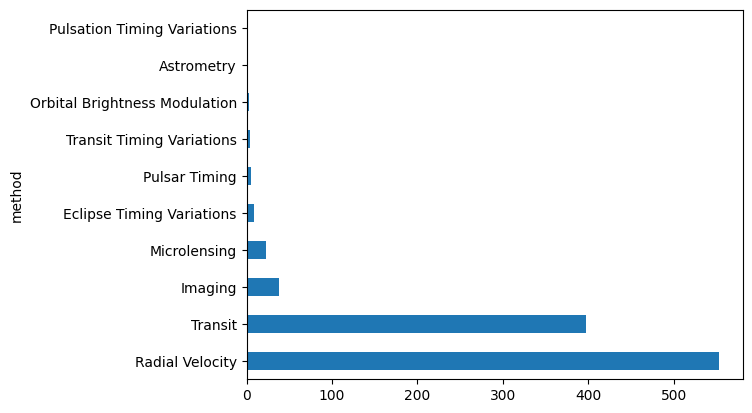

In [33]:
df["method"].value_counts().plot.barh();

## 7.Sürekli Değişken Özetleri


In [34]:
import seaborn as sns 
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [35]:
# Sürekli değişkenleri seçmek, sayısal değerler
df_num = df.select_dtypes(include = ["float64", "int64"])

In [36]:
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [37]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [38]:
# Belli bir değişkeni seçip tanımlama
df_num["distance"].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [39]:
# Sunum şeklini özelleştirme,

print("Ortalama: " + str(df_num["distance"].mean()))
print("Dolu Gözlem Sayısı: " + str(df_num["distance"].count())) 
print("Maksimum Değer: " + str(df_num["distance"].max()))
print("Minimum Değer: " + str(df_num["distance"].min()))
print("Medyan: " + str(df_num["distance"].median()))
print("Standart Sapma: " + str(df_num["distance"].std()))

Ortalama: 264.06928217821786
Dolu Gözlem Sayısı: 808
Maksimum Değer: 8500.0
Minimum Değer: 1.35
Medyan: 55.25
Standart Sapma: 733.1164929404421


# 8.Dağılım Grafikleri


## 8.1. Barplot
### Kategorik veriyi görselleştirme: Göz rengi, cinsiyet, sınıflar


**Veri Seti Hikayesi**

**price**: dolar cinsinde fiyat ($326–$18,823)

**carat**: ağırlık (0.2–5.01)

**cut**: kalite (Fair, Good, Very Good, Premium, Ideal)

**color**: renk (from J (worst) to D (best))

**clarity**: temizliği, berraklığı (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x**: length in mm (0–10.74)

**y**: width in mm (0–58.9)

**z**: depth in mm (0–31.8)

**depth**: toplam derinlik yüzdesi = z / mean(x, y) = 2 * z / (x + y) (43–79)

**table**: elmasın en geniş noktasına göre genişliği (43–95)



In [40]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Veri Setine Hızlı Bakış**

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [42]:
# sürekli değişkenlerin yapısı
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [43]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


"cut" verisi kategorik değişkenlerden oluşmaktadır.

In [44]:
# kalite türleri
# df adlı DataFrame’e ait olan cut kolonunda bulunan 
### -> kategorik değişken sınıflarının frekans sayılarını verir

df["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [45]:
# renklerin frekansları
df["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

### *ordinal tanımlama*

In [46]:
# kategorik değişkenler arasında ordinal yani sıralı: askeri ünvan gibi
from pandas.api.types import CategoricalDtype

In [47]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [48]:
# kategorik değişkeni ordinal hale getirip sırala
df.cut = df.cut.astype(CategoricalDtype(ordered = True))
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [49]:
# kategorik değişken ama sıralı hale geldi.
df.cut.head(1)

# !!! dikkat kendisi harflere göre sıralama yaptı.
# gerçek sıralama nasıldı? 
### ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']
# ideal en iyisi, sıralamayı doğru şekilde tanımlamak gerek

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [50]:
# liste oluşturma
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]

In [51]:
## şimdi doğru sıralamayı verdim.
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
df.cut.head(1)
# veri setinin hikayesini çok iyi bilinmesi gerekiyor.

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

# 9. barplot, Sütun Grafiği


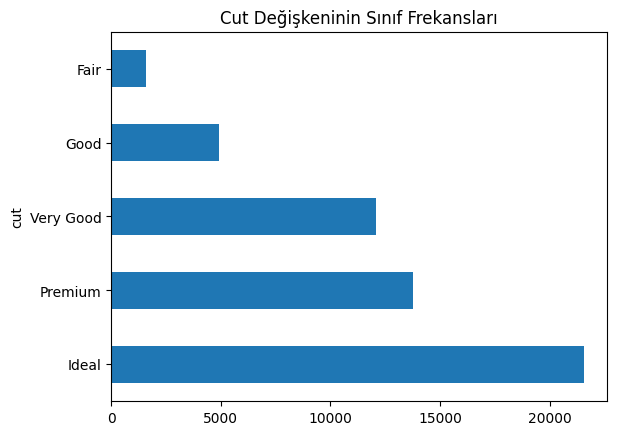

In [52]:
# Pandas ile görselleştirme
# sona noktalı virgül koyunca bilgi kayboluyor
# set title bilgi notu, başlık ekleme
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları");

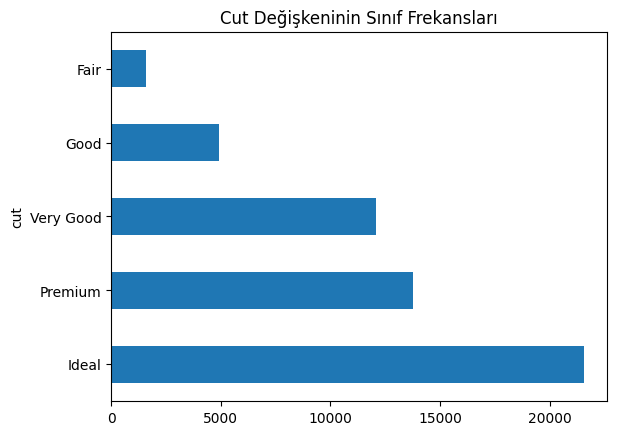

In [53]:
# farklı ifade ediş, parantezlere dikkat, 
# daha okunaklı
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

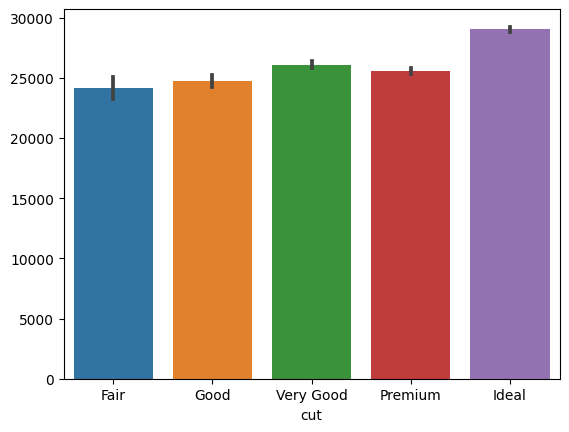

In [54]:
# Seaborn ile Görselleştirme, 
sns.barplot(x = "cut", y = df.cut.index, data= df);
# renkler çok güzel oldu

# 10.Sütun Grafiğinde Çaprazlamalar
### Kırılımların göz ününde bulundurulması

In [55]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


C:\Users\skumsar\AppData\Local\anaconda3\envs\ML_50\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


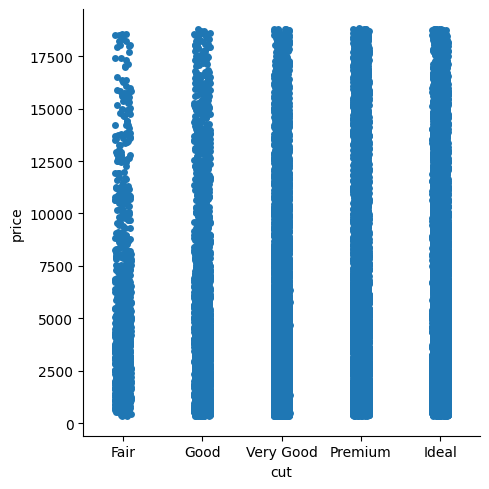

In [56]:
# cut ile price arasındaki ilişki, 
# kalite ile fiyat arasındaki ilişki

## cut kategorik, x ekseninde
## price sürekli, nicel veri y ekseninde

sns.catplot(x = "cut", y = "price", data = df);

# noktaların çokluğu yani yoğunluğu
# kaliteler artıkça fiyatlar da artıyor.

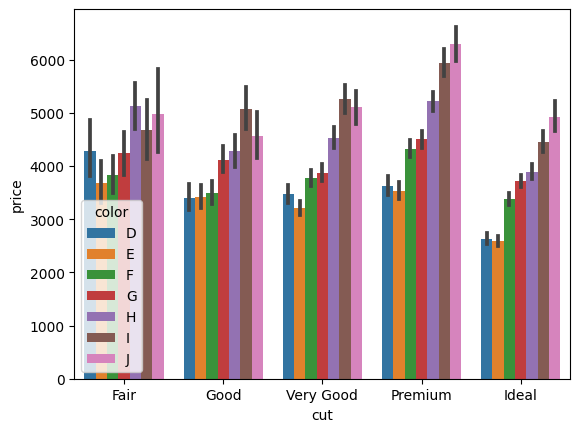

In [57]:
# yeni bir boyut ekleme
# cut, price 'a renk yani color boyutunu ekleme, yeni kırılma ekleme
# color da kategorik bir değişken.
sns.barplot(x = "cut", y = "price", hue = "color", data = df);

# Görselleştiriğimiz veriyi nasıl doğrulayabiliriz?

In [58]:
# önce 'cut' göre sonra 'color'a göre grupla, s
# sonrasında fiyata göre ortalama alma 
df.groupby(["cut","color"])["price"].mean()


cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

# 11.Histogram ve Yoğunluk
#### Dayısal verilerdeki histogram ile gösterme

In [59]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


C:\Users\skumsar\AppData\Local\Temp\ipykernel_9728\418449843.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price, kde = False);


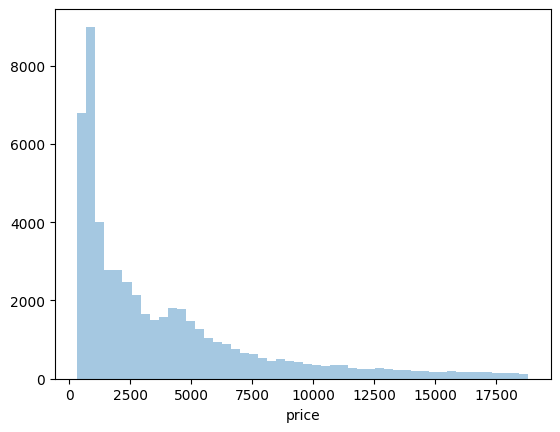

In [60]:
# kde, yoğunluk grafiğini grafiğe koysun mu? 
sns.distplot(df.price, kde = False);


C:\Users\skumsar\AppData\Local\Temp\ipykernel_9728\2874296696.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price, kde = True);


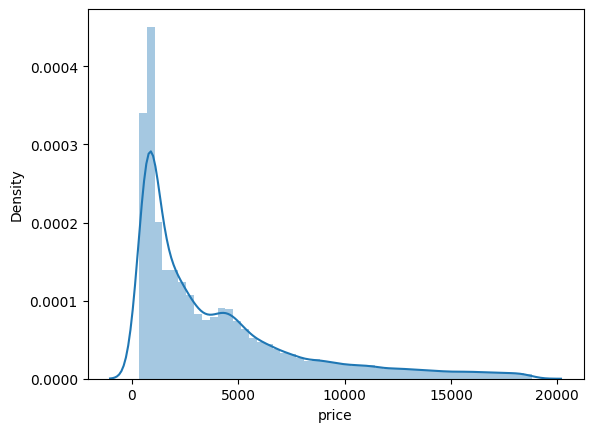

In [61]:
# kde, yoğunluk grafiğini grafiğe koysun mu? 
sns.distplot(df.price, kde = True);

#Histogram belli aralıklara bölerek dağılım ile histogram oluşturur

In [62]:
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [63]:
?sns.distplot

Signature:
sns.distplot(
    a=None,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
    x=None,
)
Docstring:
DEPRECATED

This function has been deprecated and will be removed in seaborn v0.14.0.
It has been replaced by :func:`histplot` and :func:`displot`, two functions
with a modern API and many more capabilities.

For a guide to updating, please see this notebook:

https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751
File:      c:\users\skumsar\appdata\local\anaconda3\envs\ml_50\lib\site-packages\seaborn\distributions.py
Type:      function

C:\Users\skumsar\AppData\Local\Temp\ipykernel_9728\12254468.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price, bins = 1000, kde = False);


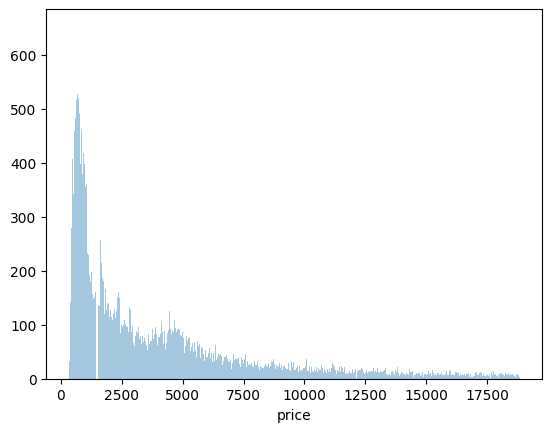

In [64]:
# bins çubuk sayısı
sns.distplot(df.price, bins = 1000, kde = False);

C:\Users\skumsar\AppData\Local\Temp\ipykernel_9728\1230191957.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price, bins = 10, kde = False);


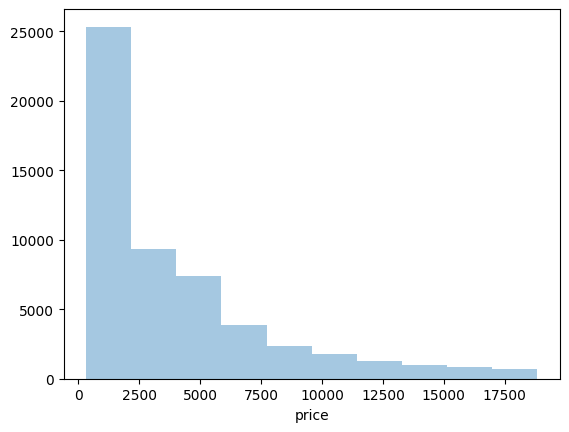

In [65]:
sns.distplot(df.price, bins = 10, kde = False);

C:\Users\skumsar\AppData\Local\Temp\ipykernel_9728\46752677.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price);


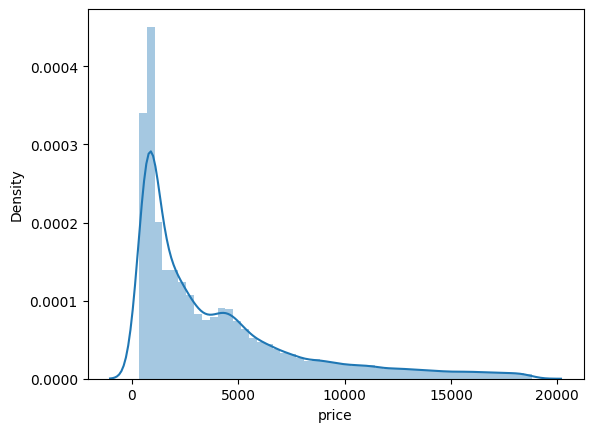

In [66]:
# histogram üzerine yoğunluk grafiği oluşturma
sns.distplot(df.price);

#histogram ile yoğunluk olasılık yoğunluk ölçeğine geçiyor.

C:\Users\skumsar\AppData\Local\Temp\ipykernel_9728\834665422.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price, hist = False);


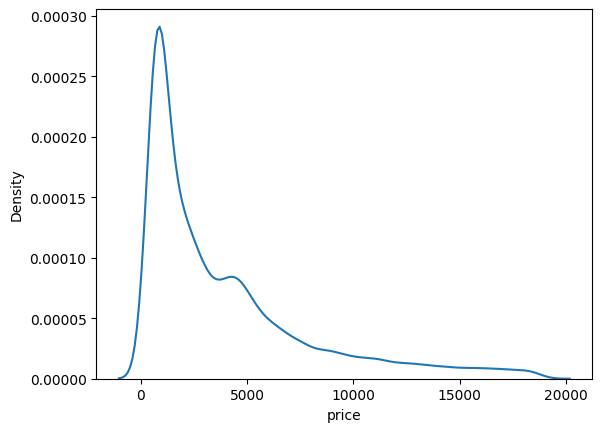

In [67]:
sns.distplot(df.price, hist = False);
# ne zaman yoğunluk, ne zaman histogram kullanılır?

C:\Users\skumsar\AppData\Local\Temp\ipykernel_9728\2652155347.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.price, shade = True);


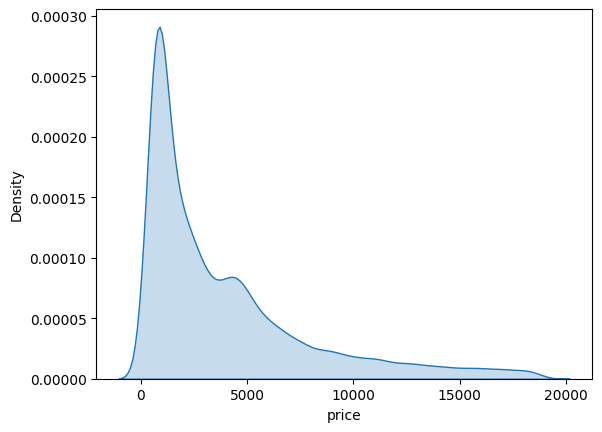

In [68]:
# yoğunluk grafiğinin altını boyayarak oluşturma
sns.kdeplot(df.price, shade = True);

## 12. Histogram ve Yoğunluk Çaprazlamaları


In [69]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


C:\Users\skumsar\AppData\Local\Temp\ipykernel_9728\180224318.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.price, shade = True);


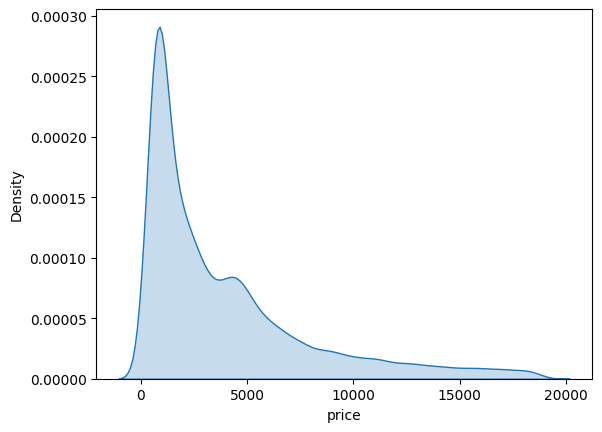

In [70]:
sns.kdeplot(df.price, shade = True);

C:\Users\skumsar\AppData\Local\anaconda3\envs\ML_50\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\skumsar\AppData\Local\anaconda3\envs\ML_50\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\skumsar\AppData\Local\anaconda3\envs\ML_50\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\skumsar\AppData\Local\anaconda3\envs\ML_50\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favo

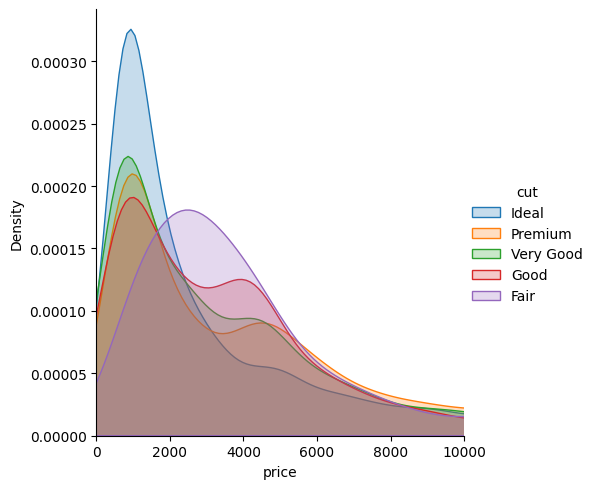

In [71]:
# nasıl olmuş?
# FacetGrid farklı 
# xlim, dilimlemek
# shade yoğunluk grafiğinin altını doldur.
(sns
 .FacetGrid(df,
              hue = "cut",
              height = 5,
              xlim = (0, 10000))
 .map(sns.kdeplot, "price", shade= True)
 .add_legend()
);
# iki tepeli varsa, bilgiyi oluşturan veride birden fazla faktör var.
# ideal diğerlerine göre fazla yer kaplıyor.

C:\Users\skumsar\AppData\Local\anaconda3\envs\ML_50\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


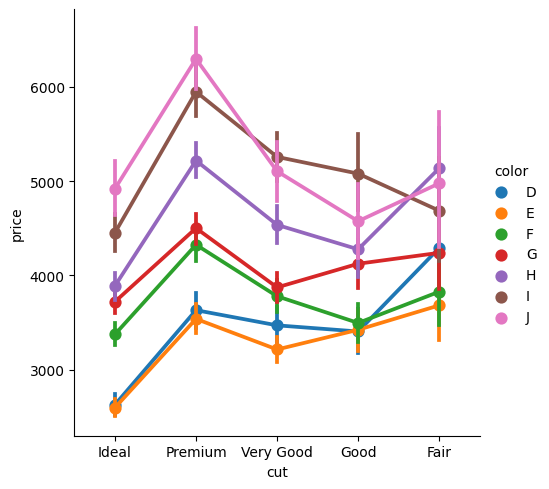

In [72]:
# ideale bakarsak, cut 
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);

#Makine öğrenmesinde AMAÇ: var olan bilgiyi farklı değişkenlerce açıklamaktır.
# amacın nihai sonucu: değişkenlerce açıklanmaktır. Değişkenlerce #Ayırt Edici özelliği formülize etmek

# 13.Boxplot


### Veri Seti Hikayesi



***total_bill***: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

***tip:*** bahşiş

***sex***: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

***smoker:*** grupta sigara içen var mı? (0=No, 1=Yes)

***day:*** gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

***time:*** ne zaman? (0=Day, 1=Night)

***size:*** grupta kaç kişi var?

In [73]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [75]:
df.describe().T
# yemek yiyenlerin sayısı artıkça bahşiş artıyor mu?
# sigara içenlerin bahşişi nasıl etkliyor?
# cinsiyet bahşişi nasıl etkliyor?

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [76]:
# cinsiyet değişkenin içindeki sayılar
df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [77]:
# sigara içme durumu
df["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [78]:
# gelme günleri
df["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [79]:
#gece mi gündüz, öğlenleri daha çok geliyor.
df["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

# 14.Boxplot


In [80]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


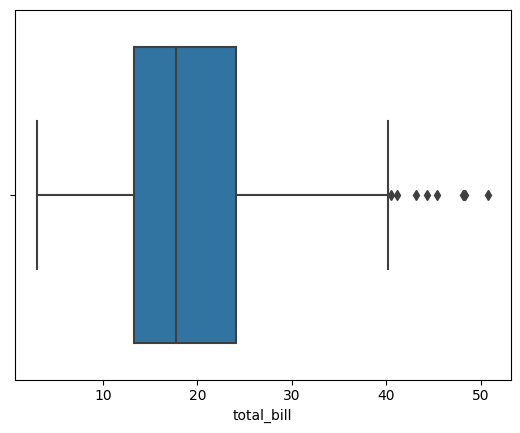

In [81]:
#boxplot kartiller, 
# en soldaki değer, min
# ortadaki çizgi, medyan
# en sağdaki çizgi ise max değeri
#aykırı gözlemler bulunuyor.
sns.boxplot(x = df["total_bill"]);

In [82]:
?sns.boxplot

Signature:
sns.boxplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    width=0.8,
    dodge=True,
    fliersize=5,
    linewidth=None,
    whis=1.5,
    ax=None,
    **kwargs,
)
Docstring:
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.

.. note::
    This function always treats one of the variables as categorical and
    draws data at ordinal positions (0, 1, ... n) on the relevant axis,
    even when the data has a numeric or date type.

See th

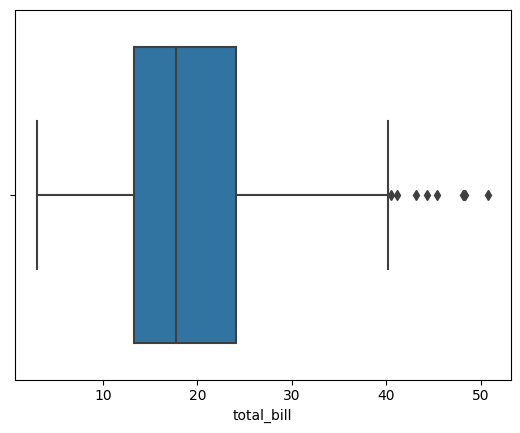

In [83]:

sns.boxplot(x = df["total_bill"], orient = "Vertical");

## 15. Kutu Grafik Çaprazlamaları


In [84]:
df.describe().T
# hangi günler daha fazla kazanıyor?


,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


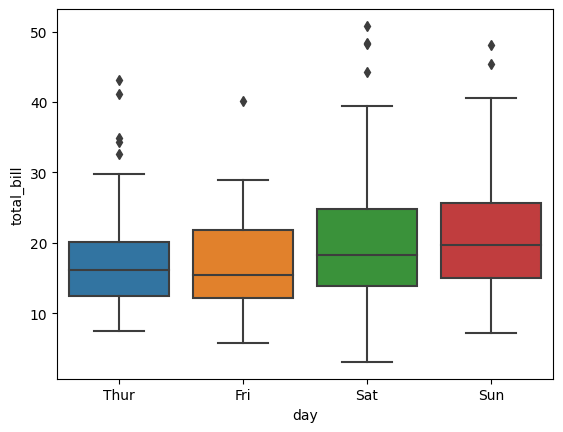

In [85]:
#Hangi gunler daha fazla kazanıyoruz?

sns.boxplot(x = "day", y = "total_bill", data = df);
#pazar günü daha müşteri daha fazla para bırıyorlar
# cts daha fazla müşteri geliyor.

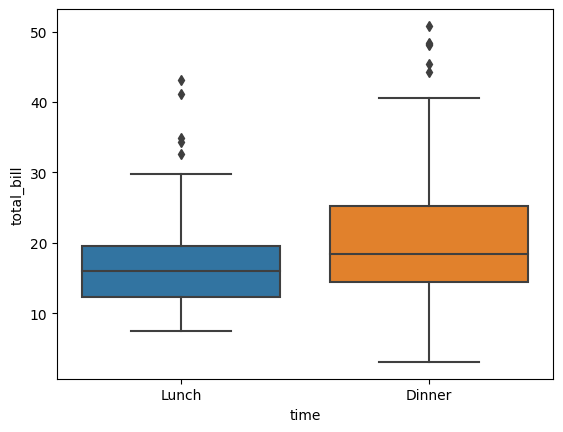

In [86]:
#sabah mı akşam mı daha çok kazanıyoruz?
 
sns.boxplot(x = "time", y = "total_bill", data = df);

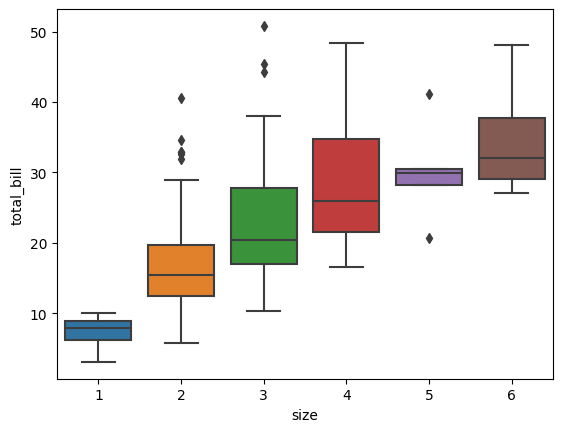

In [87]:
#kisi sayısı kazanç sayısı arasındaki ilişki nedir?

sns.boxplot(x = "size", y = "total_bill", data = df);

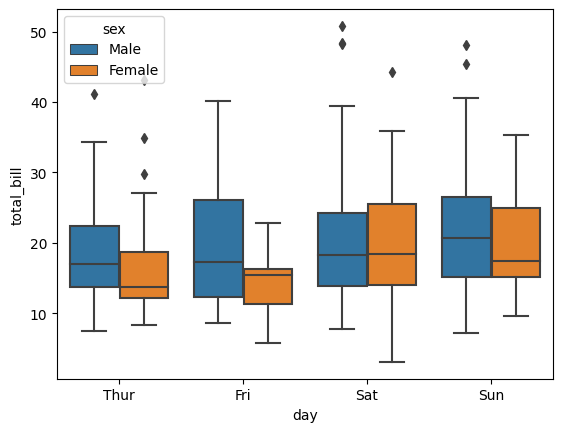

In [88]:
# Gün, cinsiyet, hesap ödeme
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = df);


# 16.Violin


In [89]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\skumsar\AppData\Local\anaconda3\envs\ML_50\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


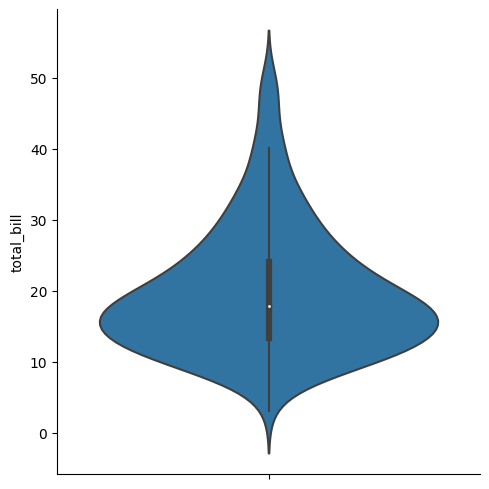

In [90]:
#  yoğunluk grafiği ile kutu grafiği kesişimi gibi düşünülebilir.
sns.catplot(y = "total_bill", kind = "violin", data = df);

## 17.Violin Grafik için Çaprazlamalar


C:\Users\skumsar\AppData\Local\anaconda3\envs\ML_50\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


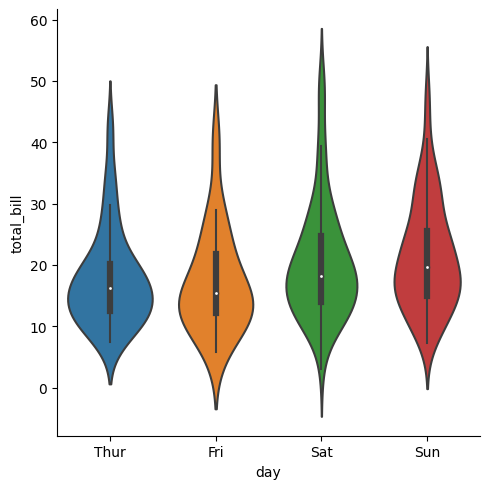

In [91]:
sns.catplot(x= "day", y = "total_bill", kind = "violin", data = df);

C:\Users\skumsar\AppData\Local\anaconda3\envs\ML_50\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


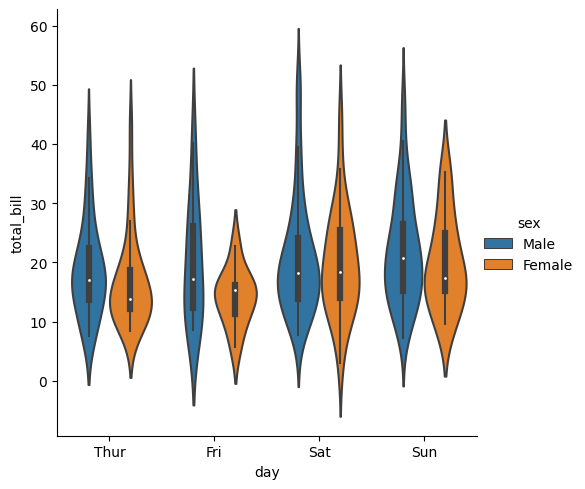

In [92]:
# günlere ve cinsiyet kırılımına göre
sns.catplot(x= "day", y = "total_bill", hue = "sex",kind = "violin", data = df);

# 18.Korelasyon Grafikleri


## 18.1. Scatterplot
##### sayısal değişkenler arasındaki ilişki,

### Veri Seti Hikayesi



***total_bill***: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

***tip:*** bahşiş

***sex***: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

***smoker:*** grupta sigara içen var mı? (0=No, 1=Yes)

***day:*** gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

***time:*** ne zaman? (0=Day, 1=Night)

***size:*** grupta kaç kişi var?

In [93]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


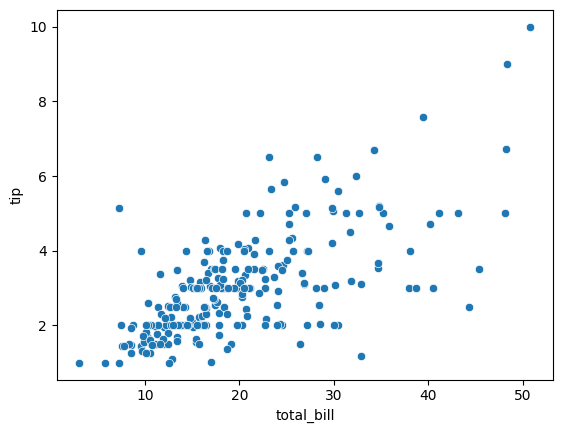

In [94]:
# ödenen hesap ile bahşiş arasında bir ilişki var mı?
sns.scatterplot(x = "total_bill", y = "tip", data = df);

## 19. Scatter plot ile Çaprazlamalar


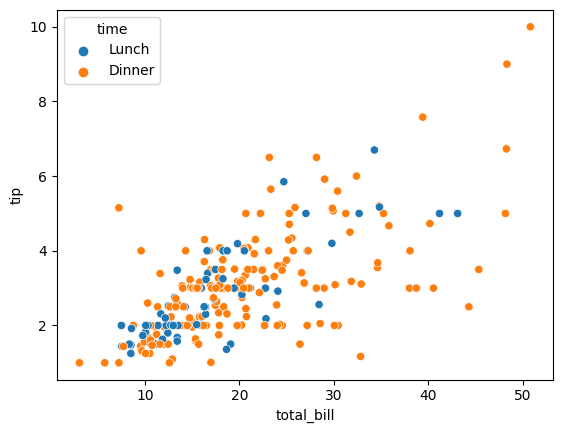

In [95]:
# toplam ödeme ve bahşiş arasındaki ilişki zamana göre ilişkisi nedir?
sns.scatterplot(x = "total_bill", y = "tip", hue = "time",data = df);

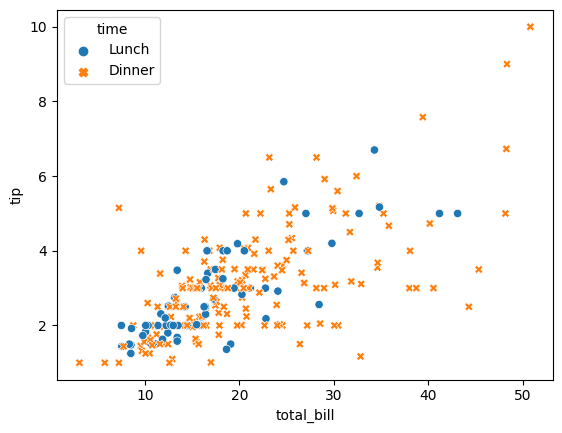

In [96]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", style = "time", data = df);

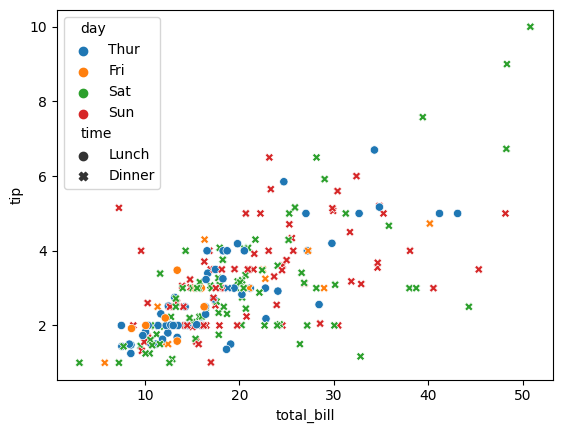

In [97]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "day", style = "time", data = df);

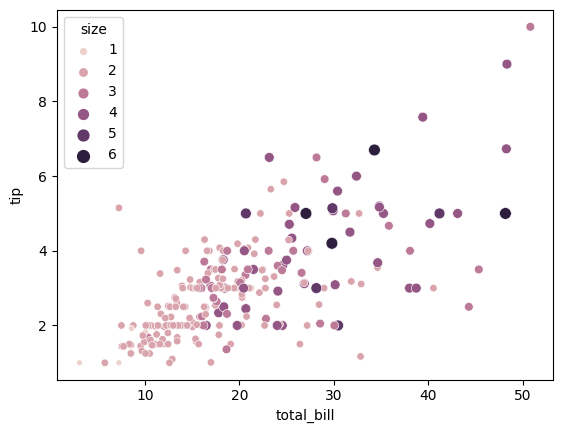

In [98]:
#sürekli değişkeni bir boyut olarak eklemek.
# kişi sayısı artıkça renklerin yoğunlu daha koyu
sns.scatterplot(x = "total_bill", y = "tip", hue= "size", size = "size", data = df);

# 20.Doğrusal İlişkinin Gösterilmesi


In [99]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\skumsar\AppData\Local\anaconda3\envs\ML_50\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


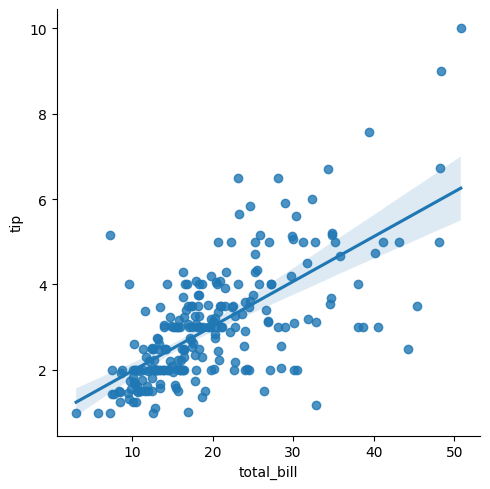

In [100]:
import matplotlib.pyplot as plt
# lm= linear model
sns.lmplot(x = "total_bill", y = "tip", data = df);

C:\Users\skumsar\AppData\Local\anaconda3\envs\ML_50\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\skumsar\AppData\Local\anaconda3\envs\ML_50\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


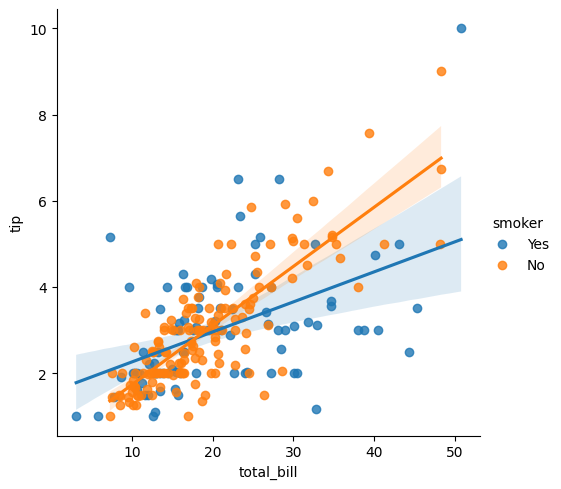

In [101]:
# SİGARA içme durumuna göre acaba nasıl bir ilişki var?
#makine öğrenmesinde bu durum önem kazanacaktır.
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = df);

C:\Users\skumsar\AppData\Local\anaconda3\envs\ML_50\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\skumsar\AppData\Local\anaconda3\envs\ML_50\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


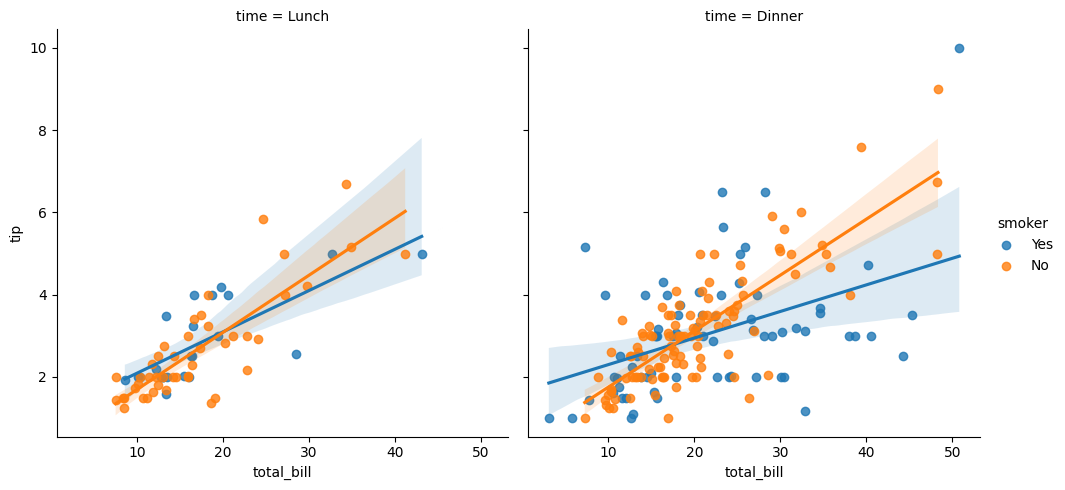

In [102]:
# col ili facetgrid benzeri grafiği bölüyor.
# iki sınıf arasında eğim farkı var ama bu fark anlamlı mı?

sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = df);

C:\Users\skumsar\AppData\Local\anaconda3\envs\ML_50\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\skumsar\AppData\Local\anaconda3\envs\ML_50\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


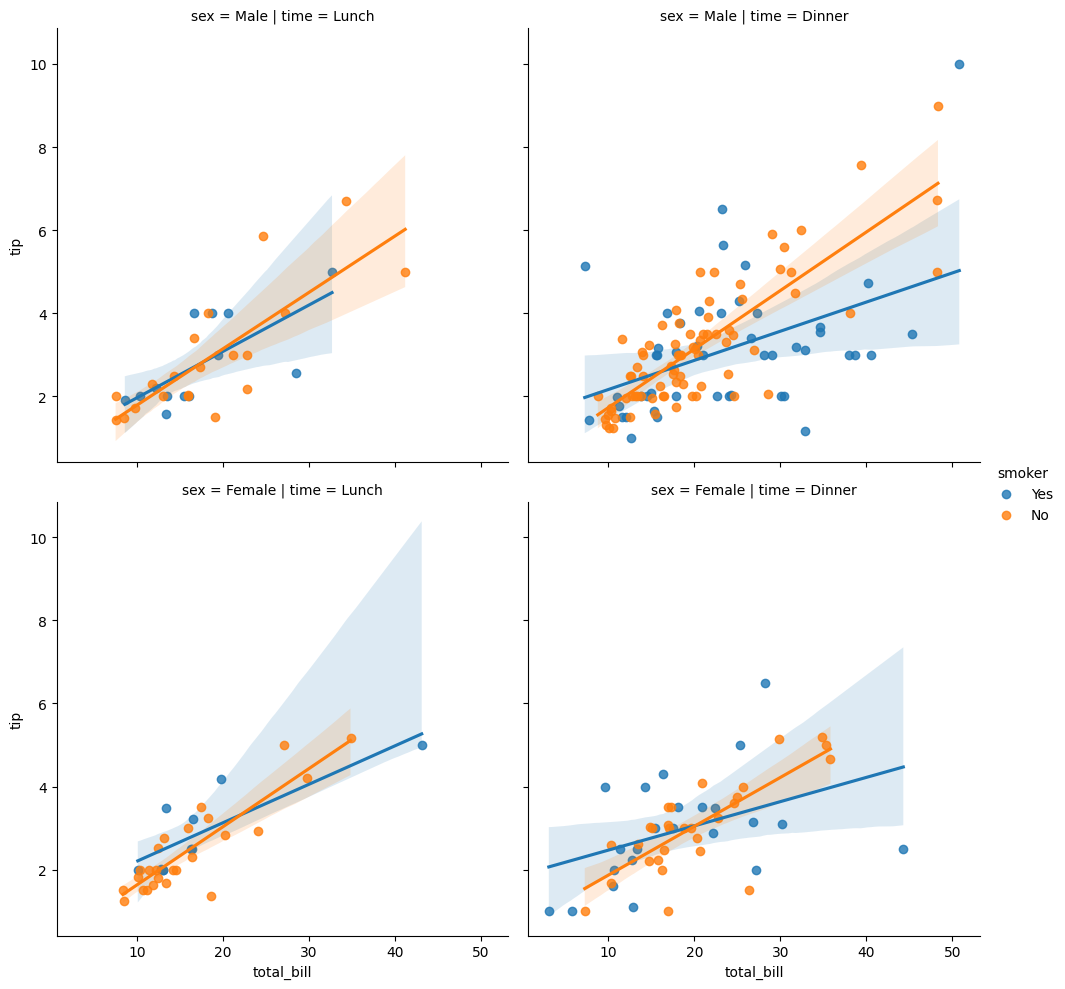

In [103]:
# col ile time
# row ile cinsiyeti ekledik. 
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", row = "sex", data = df);

 # 21. Scatterplot Matrisi
 
 ### sayısal değişkenler arasındaki saçılımlar

In [104]:

import seaborn as sns; 
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

#çiçek türleri

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [105]:
df.dtypes
# katgorik değişkenler arasında bir sıralama yok. 

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [106]:
df.shape

(150, 5)

C:\Users\skumsar\AppData\Local\anaconda3\envs\ML_50\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


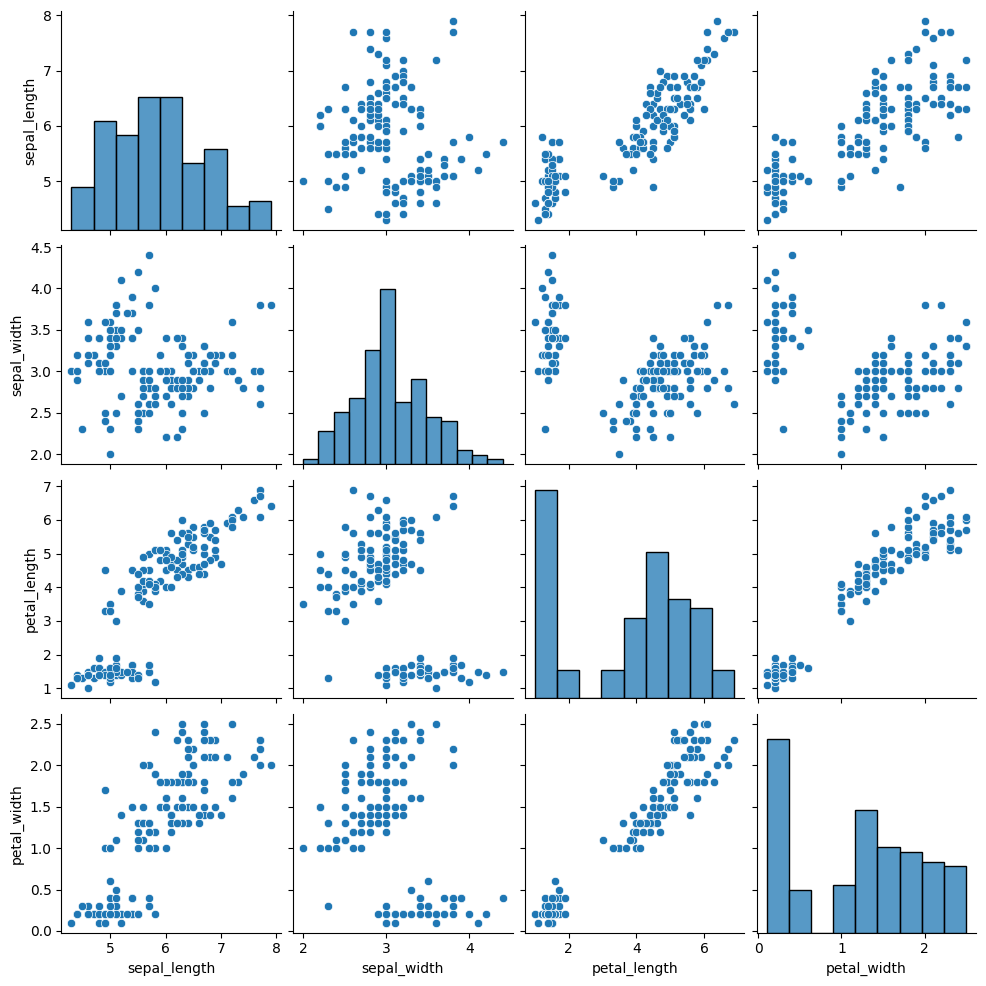

In [107]:
sns.pairplot(df);
# eksenlerde gösterilen dağılım. çarpı aşağıya doğru olan
# değişkenler arasında farklılıklar

C:\Users\skumsar\AppData\Local\anaconda3\envs\ML_50\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


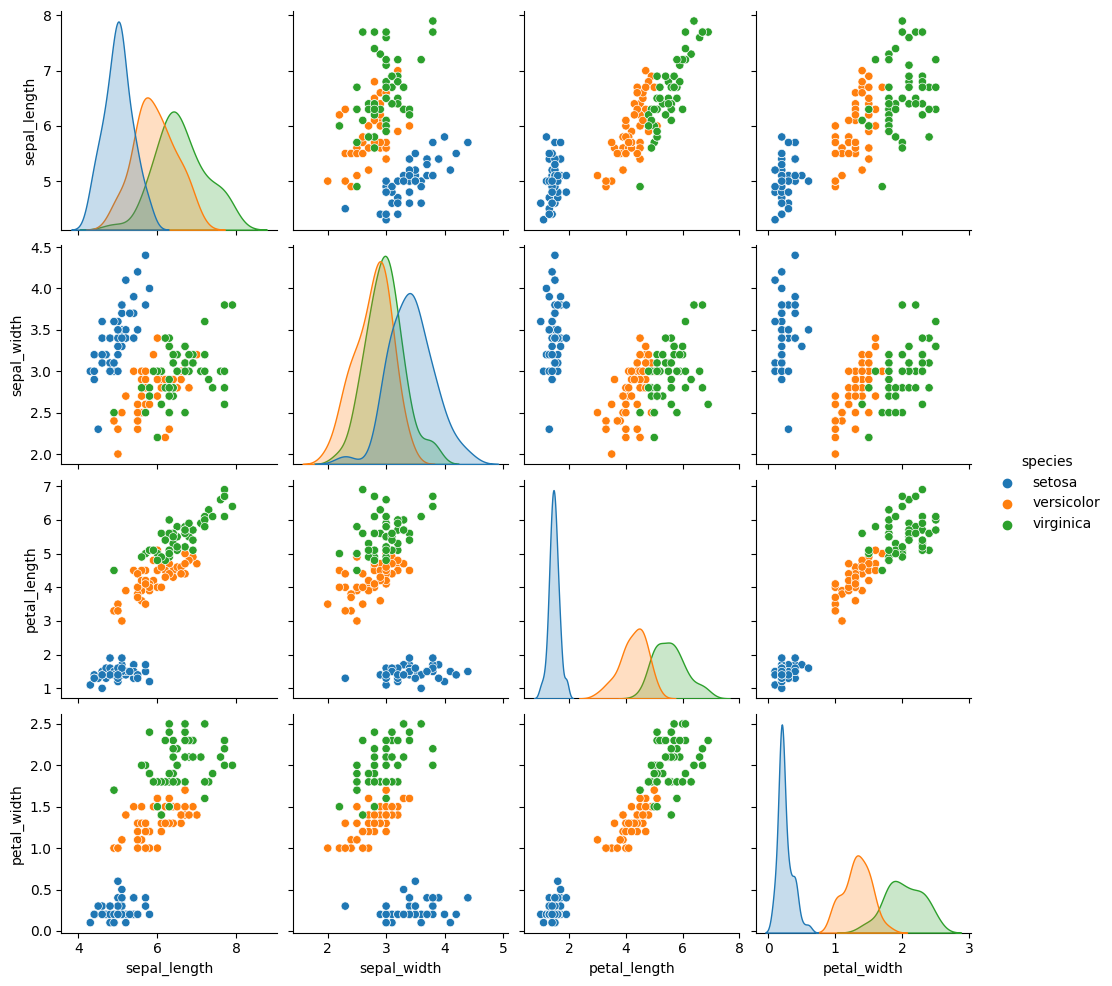

In [108]:
# kategorik değişkeni yeni bir boyut ekleme, türleri ekledik.
# farklı tepeler var.
sns.pairplot(df, hue = "species");

C:\Users\skumsar\AppData\Local\anaconda3\envs\ML_50\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


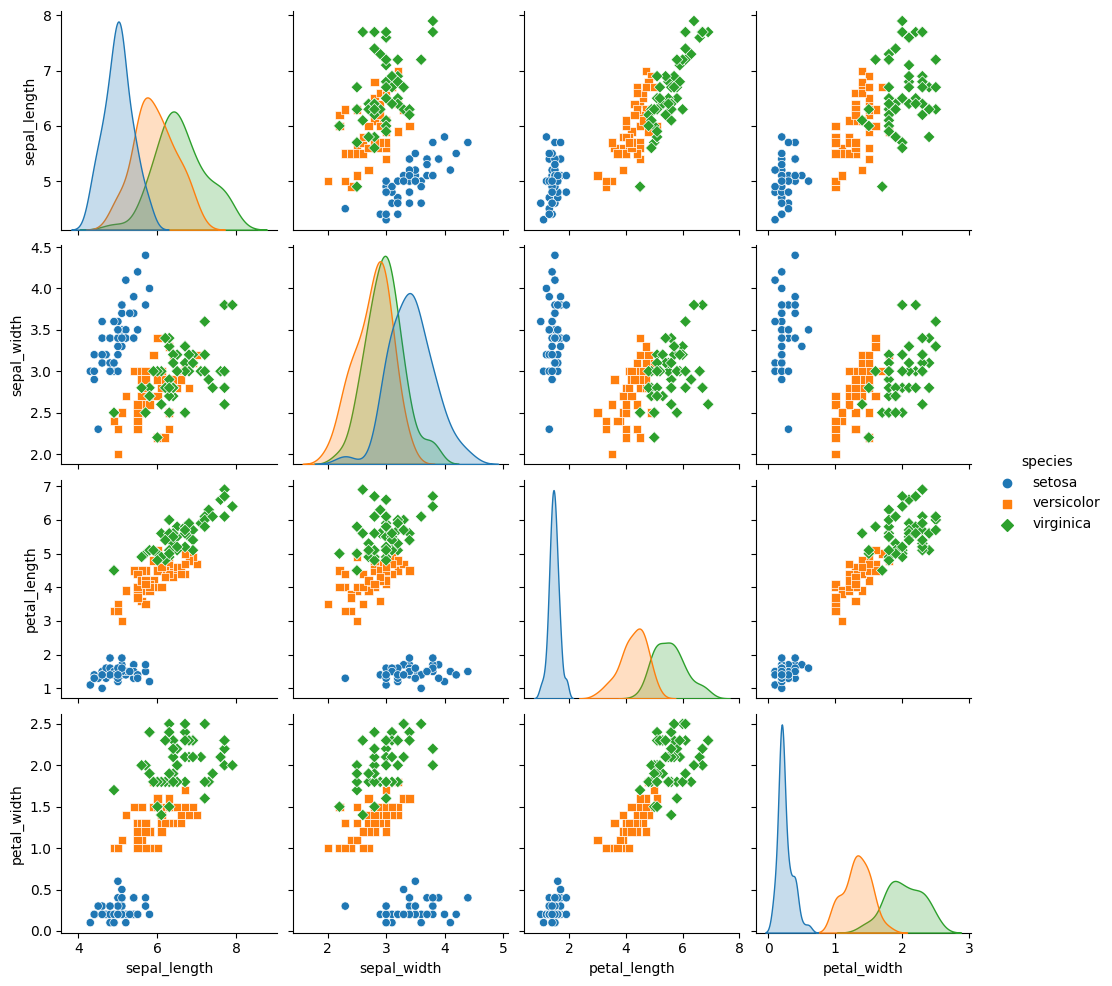

In [109]:
# markers değişimi
sns.pairplot(df, hue = "species", markers = ["o","s","D"]);

C:\Users\skumsar\AppData\Local\anaconda3\envs\ML_50\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


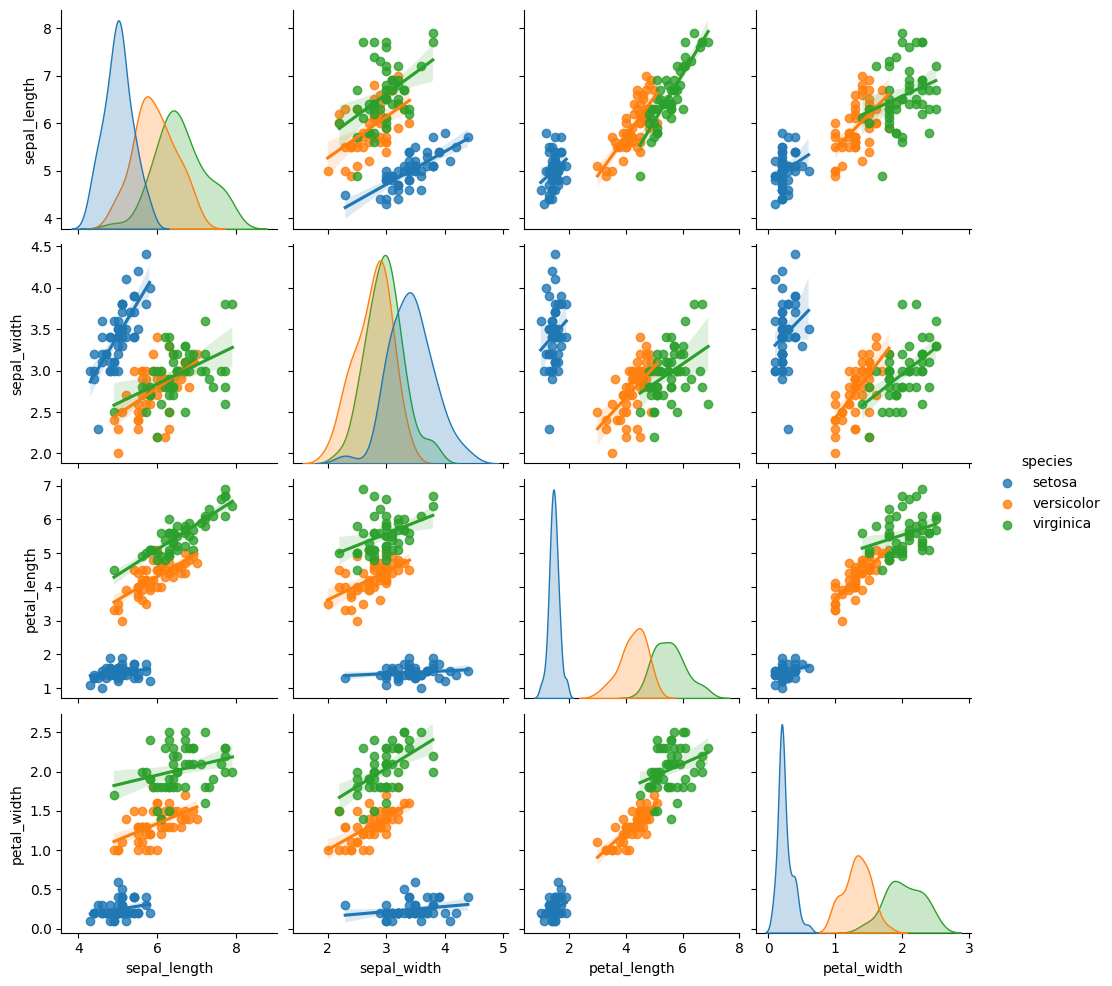

In [110]:
# grafiğe doğru eklemeğ
sns.pairplot(df, kind = "reg", hue = "species");

# 22. Heatmap

## Veri Seti Hikayesi
#### uzun vadeli, uzun ölçekli tekrar edenler,

In [111]:
## yıllara, aylara, yolculuklar
import seaborn as sns
flights = sns.load_dataset('flights')
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [112]:
df.shape

(144, 3)

In [113]:
df["passengers"].describe()
# artan trend etkisi, yolculukların etkisi çıkartırılısa acaba nasıl bir değişim var?

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [114]:
# yapısal hale çevirme, x,y, sürekli değiken
df = df.pivot("month", "year", "passengers");
df
# efsane olmadı mı?

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

In [115]:
df = df.pivot(index='month', columns='year', values='passengers')
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


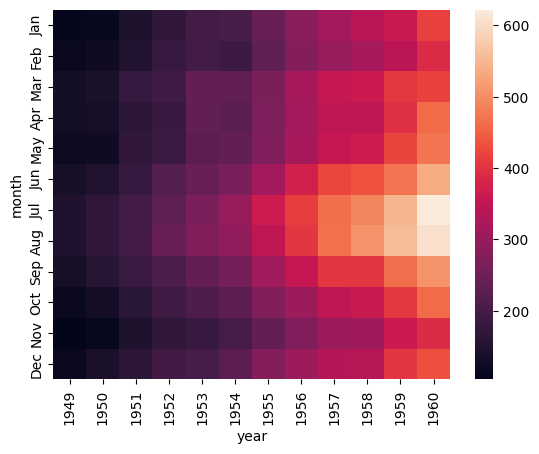

In [116]:
#pattern detection, yapıyı büyük resmini görmek için

sns.heatmap(df);
#yıllar geçtikçe uçuş artış gösterilmiş, beyazlaştıkça
# aylar trendi var görebildiniz mi?


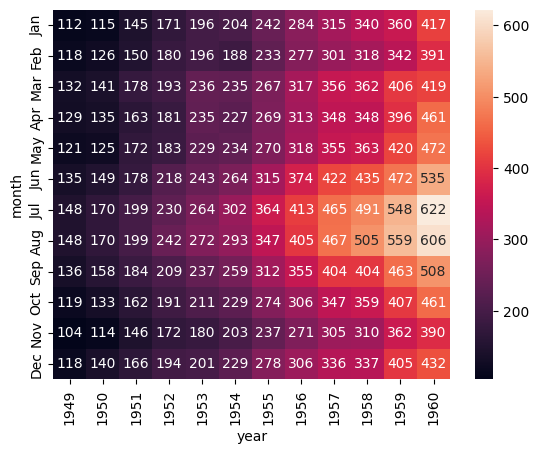

In [117]:
# veriye sayısayı okumal.
sns.heatmap(df, annot = True, fmt = "d");

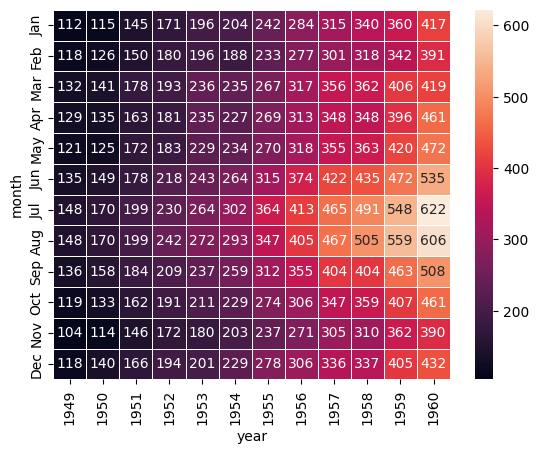

In [118]:
# linewidths hücre arası boşluk ekleme
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5);

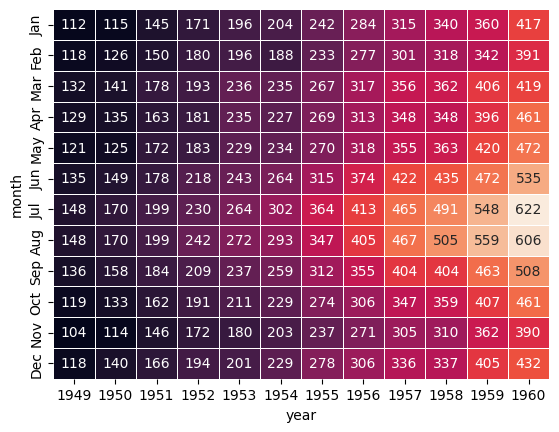

In [119]:
#cbar false olunca legend gidecektir

sns.heatmap(df, annot = True, fmt = "d", linewidths = .5, cbar = False);

 
# 23.Çizgi Grafik

## Veri Seti Hikayesi


In [120]:
###  beyin sinyal toplayıcı 
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [121]:
df.shape

(1064, 5)

In [122]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [123]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [124]:
# herbir zaman noktası eşsiz değer mi var acaba?
# herbir zaman noktasın eşit bir sinyal verişmiştir
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [125]:
#sinyaller eşsiz mi acaba?
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [126]:
# zaman noktlarına göre nasıl acaba sinyal dağıtıyor.
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


## 24.Çizgi Grafik ve Çaprazlamalar


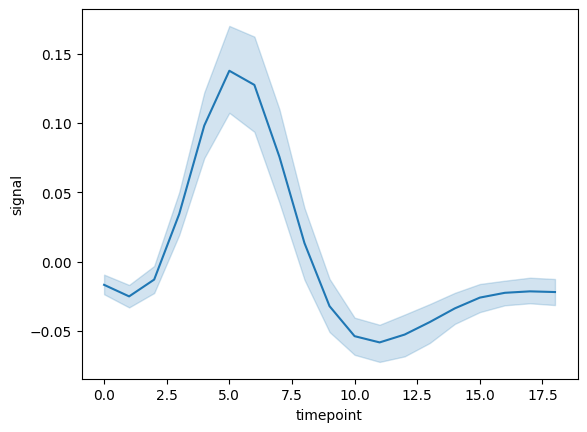

In [127]:
# zamana göre sinyal azalıp artmış
sns.lineplot(x = "timepoint", y = "signal", data = df);

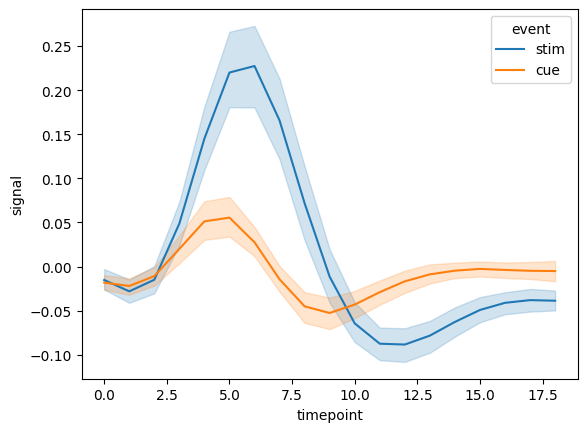

In [128]:
# grafiğin peak noktalarını 'event' kırılımı ile anlama
sns.lineplot(x = "timepoint", y = "signal", hue = "event", data = df);


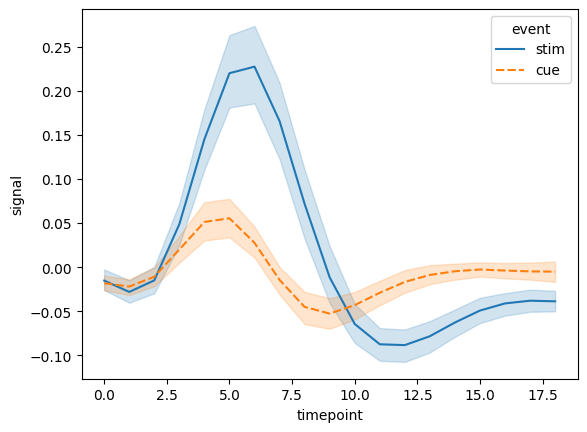

In [129]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", style = "event", data = df);


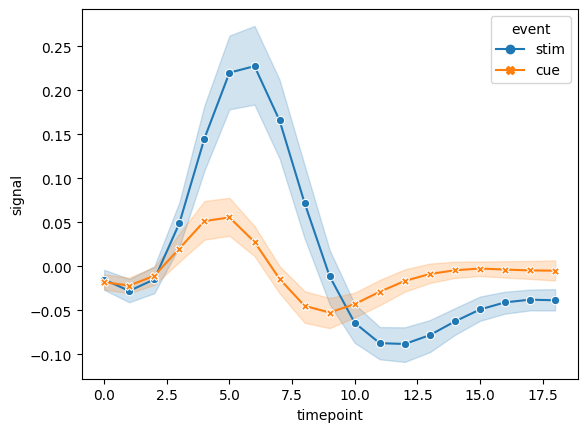

In [130]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "event", 
             style = "event", 
             markers = True,  dashes = False, data = df);
 

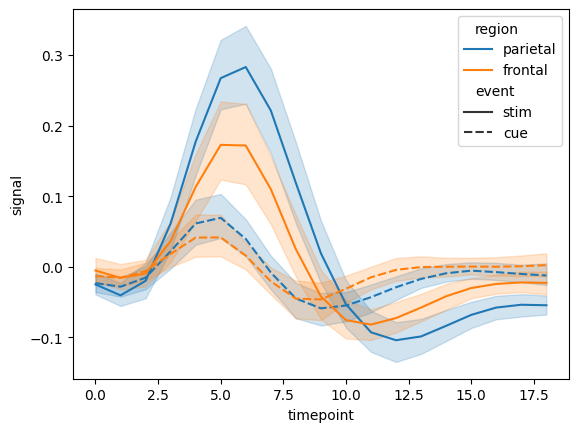

In [131]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "region", # bölgeleri yeni bir boyut
             style = "event", 
             data = df);

# 25.Basit Zaman Serisi Grafiği


In [132]:
# modül indirme, modül yükleme
!pip install pandas_datareader
import pandas_datareader as pr

In [135]:
# apple n borsadaki verisi
df = pr.get_data_yahoo("AAPL", start = "2016-01-01", end = "2021-04-09")
df.head()

TypeError: string indices must be integers

In [136]:
#df = pr.get_data_yahoo("AAPL", start = "2016-01-01", end ="2019-08-25")

In [137]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [138]:
import yfinance as yf

In [139]:
df = yf.download("AAPL", start = "2016-01-01", end = "2019-08-25")

[*********************100%***********************]  1 of 1 completed


In [140]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.041487,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.439024,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,22.980331,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.010452,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.126837,283192000


In [141]:
df.shape

(917, 6)

In [142]:
kapanis = df["Close"]

In [143]:
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

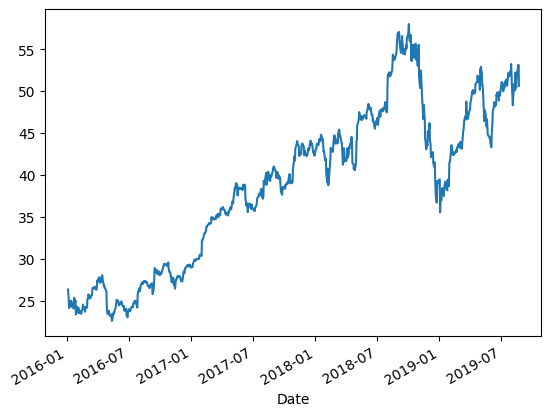

In [144]:
kapanis.plot();

In [145]:
kapanis.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15',
               '2019-08-16', '2019-08-19', '2019-08-20', '2019-08-21',
               '2019-08-22', '2019-08-23'],
              dtype='datetime64[ns]', name='Date', length=917, freq=None)

In [146]:
## index haline getirme
kapanis.index = pd.DatetimeIndex(kapanis.index)
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

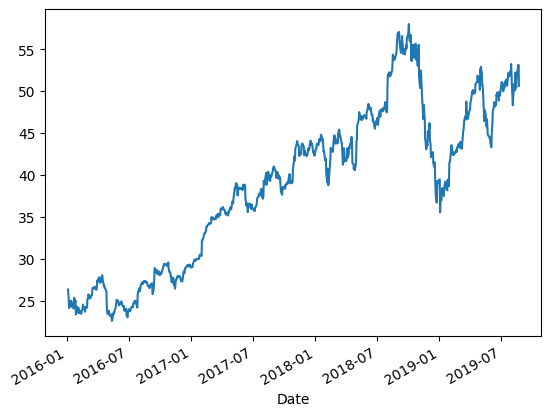

In [147]:
kapanis.plot();

In [148]:
# Bölüm Sonu Değerlendirmesi